# Fine-tune VGG16 Image Classifier

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
# from matplotplt import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'cats-and-dogs/train'
valid_path = 'cats-and-dogs/valid'
test_path = 'cats-and-dogs/test'

In [3]:
train_batch = ImageDataGenerator().flow_from_directory(train_path,
                                                       target_size=(224,224),
                                                       classes=['dog','cat'],
                                                       batch_size=10)
valid_batch = ImageDataGenerator().flow_from_directory(valid_path,
                                                       target_size=(224,224),
                                                       classes=['dog','cat'],
                                                       batch_size=4)
test_batch = ImageDataGenerator().flow_from_directory(test_path,
                                                       target_size=(224,224),
                                                       classes=['dog','cat'],
                                                       batch_size=10)


Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
# plots images with labels 
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


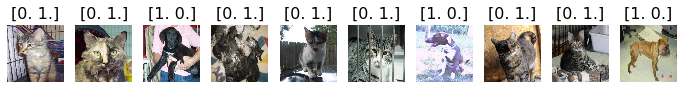

In [5]:

imgs, labels = next(train_batch)

plots(imgs, titles=labels)

# Build

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

Instructions for updating:
Colocations handled automatically by placer.
  4284416/553467096 [..............................] - ETA: 1:15:35

KeyboardInterrupt: 

In [ ]:
vgg16_model.summary()

In [ ]:
# we can see the vgg16_model is not a sequential model, we need to
# change it to sequential model.

print(type(vgg16_model))
vgg16_model.layers

In [ ]:

model = Sequential()

# add the layer of vgg16 to our model
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:

model.summary()

# our new model is sequential model
type(model)

In [ ]:
# pop the last layer
model.layers.pop()

model.summary()

In [ ]:

# Freeze the params of the vgg16 model
for layer in model.layers:
    layer.trainable = False
    
# add the new output layer
model.add(Dense(2, activation = 'softmax'))

model.summary()

# Train and fine-tuned

In [ ]:
model.compile(Adam(lr=.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batch, steps_per_epoch=4, 
                    validation_data=valid_batch, validation_steps=4, epochs=5, verbose=1)

# Predict using vgg16

In [ ]:
test_imgs, test_labels = next(test_batch)
plots(test_imgs,titles=test_labels)

In [ ]:
test_label = test_labels[:,0]
test_label

In [ ]:
predictions = model.predict_generator(test_batch,steps=1,verbose=0)

predictions

In [ ]:
cm = confusion_matrix(test_label, np.round(predictions[:,0]))

In [ ]:

def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,newaxis]
        print('Normalized confusion matirx')
    else:
        print('Confusion matirx, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')